# Project 2: Data Representations and Clustering
#### Serena Tang, Liwen Yang, Winston Wang

### Clustering with Sparse Text Representations

*1. Generate sparse TF-IDF representations: Following the steps in Project 1, transform the documents into TF-IDF vectors. Use min df = 3, exclude the stopwords (no need to do stemming or lemmatization), and remove the headers and footers. No need to do any additional data cleaning.*

In [1]:
from sklearn.datasets import fetch_20newsgroups

# get dataset
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
                  'rec.autos', 'rec.motorcycles','rec.sport.baseball', 'rec.sport.hockey']
newsgroups = fetch_20newsgroups(categories=categories, remove=('headers', 'footers'))

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# count vectorizer on corpus
tf_vectorizer = CountVectorizer(min_df = 3, stop_words='english')
newsgroups_vectorized = tf_vectorizer.fit_transform(newsgroups.data)

# count vector to TF-IDF
transformer = TfidfTransformer()
newsgroups_tfidf = transformer.fit_transform(newsgroups_vectorized)

print('Newsgroups TF-IDF Dimensions: ', newsgroups_tfidf.shape)

Newsgroups TF-IDF Dimensions:  (4732, 17131)


### QUESTION 1
- ***Report the dimensions of the TF-IDF matrix you obtain.***
    - The newsgroups TF-IDF matrix had a dimension of (4732, 13477). 

*2. Clustering: Apply K-means clustering with k = 2 using the TF-IDF data. Note that the KMeans class in sklearn has parameters named random state, max iter and n init. Please use `random state=0`, `max iter ≥1000`, and `n_init ≥30`. You can refer to sklearn - Clustering text documents using k-means for a basic work flow.*
- *(a) Given the clustering result and ground truth labels, contingency table A is the matrix whose entries $A_{ij}$ is the number of data points that belong to the i’th class and the j’th cluster.*

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Get clusters
kmeans = KMeans(random_state=0, n_clusters=2, max_iter=1000, n_init=30)
kmeans.fit(newsgroups_tfidf)

KMeans(max_iter=1000, n_clusters=2, n_init=30, random_state=0)

In [4]:
# Map the categories to classes
class_1 = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware']
class_2=['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
category_to_class=[]
cat_to_num={}
for idx, cat in enumerate(newsgroups.target_names):
    cat_to_num[idx]=cat
for num in newsgroups.target:
    if 'comp.' in cat_to_num[num]:
        category_to_class.append(0)
    else:
        category_to_class.append(1)

<Figure size 432x288 with 0 Axes>

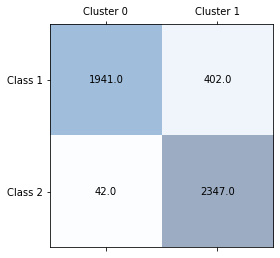

In [5]:
from sklearn import metrics

# plot contingency matrix
fig = plt.figure()
cont_matrix = metrics.cluster.contingency_matrix(category_to_class, kmeans.labels_)
plt.matshow(cont_matrix, cmap=plt.cm.Blues, alpha=0.4)
for (i, j), z in np.ndenumerate(cont_matrix):
    plt.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
plt.xticks(range(2), ['Cluster 0', 'Cluster 1'])
plt.yticks(range(2), ['Class 1', 'Class 2'])
plt.show()

### QUESTION 2

***Report the contingency table of your clustering result. You may use the provided plotmat.py to visualize the matrix. Does the contingency matrix have to
be square-shaped?***
- The contingency table of the clustering result is shown above. Based on the strong diagonal, we can infer that `Cluster 1` correlates to `Class 1` and `Cluster 0` correlates to `Class 2`. The contingency matrix should be square-shaped as we set the number of clusters in Kmeans to be 2 and our data has 2 classes. If we set the number of clusters in Kmeans to be a different number than the number of classes in the data, the contingency matrix will not be square. 

### Question 3
***Report the 5 clustering measures explained in the introduction for K-means clustering.***

In [6]:
from sklearn.metrics import cluster

def print_cluster_metrics(y, y_pred):
  print("Homogeneity: ", cluster.homogeneity_score(y, y_pred))
  print("Completeness: ",cluster. completeness_score(y, y_pred))
  print("V-measure: ", cluster.v_measure_score(y, y_pred))
  print("Adjusted Rand-Index: ", cluster.adjusted_rand_score(y, y_pred))
  print("Adjusted Mutual Information Score: ", cluster.adjusted_mutual_info_score(y, y_pred))


# print clustering measures
print_cluster_metrics(category_to_class, kmeans.labels_)

Homogeneity:  0.5891851383382092
Completeness:  0.60054673993716
V-measure:  0.5948116891031808
Adjusted Rand-Index:  0.6598278657872265
Adjusted Mutual Information Score:  0.5947492978713664


### Question 4
***Report the plot of the percentage of variance that the top r principle components retain v.s. r, for r = 1 to 1000.***

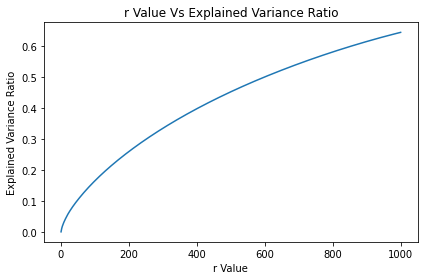

In [7]:
from sklearn.decomposition import TruncatedSVD

# get principle components
svd_1000 = TruncatedSVD(n_components=1000, random_state=0)
newsgroups_lsi = svd_1000.fit_transform(newsgroups_tfidf)

# get explained variance ratio
x = list(range(1, 1001))
ratio = svd_1000.explained_variance_ratio_
ex_var = np.cumsum(ratio)

# plot explained variance ratio
plt.plot(x, ex_var)
plt.ylabel('Explained Variance Ratio')
plt.xlabel('r Value')
plt.title('r Value Vs Explained Variance Ratio')
plt.tight_layout()

### Question 5
***Let r be the dimension that we want to reduce the data to (i.e. n components). Try r = 1−10, 20, 50, 100, 300, and plot the 5 measure scores v.s. r for both SVD
and NMF. Report a good choice of r for SVD and NMF respectively. Note: In the choice of r, there is a trade-off between the information preservation, and better performance of
k-means in lower dimensions.***
- The plots are shown below. Based on the results, r=50 is a good choice for SVD and r=2 is a good choise for NMF.

In [8]:
from sklearn.decomposition import NMF

r = [1,2,3,4,5,6,7,8,9,10,20,50,100,300]

def SVD_score(r,k,X,y):
    adj_rand_score=[]
    adj_mutual_score=[]
    hom_score=[]
    comp_score=[]
    v_score=[]
    for dim in r:
        svd=TruncatedSVD(n_components = dim, random_state=0) # svd dimensionality reduction
        trunc_svd=svd.fit_transform(X)
        kmeans = KMeans(random_state=0, n_clusters=k, max_iter=1000, n_init=30) # kmeans cluster
        kmeans.fit(trunc_svd)
        adj_rand_score.append(cluster.adjusted_rand_score(y,kmeans.labels_)) # get scores
        adj_mutual_score.append(cluster.adjusted_mutual_info_score(y, kmeans.labels_))
        hom_score.append(cluster.homogeneity_score(y,kmeans.labels_))
        comp_score.append(cluster.completeness_score(y,kmeans.labels_))
        v_score.append(cluster.v_measure_score(y,kmeans.labels_))
    return adj_rand_score, adj_mutual_score, hom_score, comp_score, v_score

def NMF_score(r,k, X,y):
    adj_rand_score=[]
    adj_mutual_score=[]
    hom_score=[]
    comp_score=[]
    v_score=[]
    for dim in r:
        nmf = NMF(n_components = dim, init='random', random_state=0, max_iter=500) # nmf dimensionality reduction
        trunc_nmf=nmf.fit_transform(X)
        kmeans = KMeans(random_state=0, n_clusters=k, max_iter=1000, n_init=30) # kmeans cluster
        kmeans.fit(trunc_nmf)
        adj_rand_score.append(cluster.adjusted_rand_score(y,kmeans.labels_)) # get scores
        adj_mutual_score.append(cluster.adjusted_mutual_info_score(y, kmeans.labels_))
        hom_score.append(cluster.homogeneity_score(y,kmeans.labels_))
        comp_score.append(cluster.completeness_score(y,kmeans.labels_))
        v_score.append(cluster.v_measure_score(y,kmeans.labels_))
    return adj_rand_score, adj_mutual_score, hom_score, comp_score, v_score

In [ ]:
# get metrics
svd_adj_rand_score, svd_mutual_score, svd_hom_score, svd_comp_score, svd_v_score= SVD_score(r,2,newsgroups_tfidf, category_to_class)
nmf_adj_rand_score, nmf_mutual_score, nmf_hom_score, nmf_comp_score, nmf_v_score= NMF_score(r,2,newsgroups_tfidf, category_to_class)

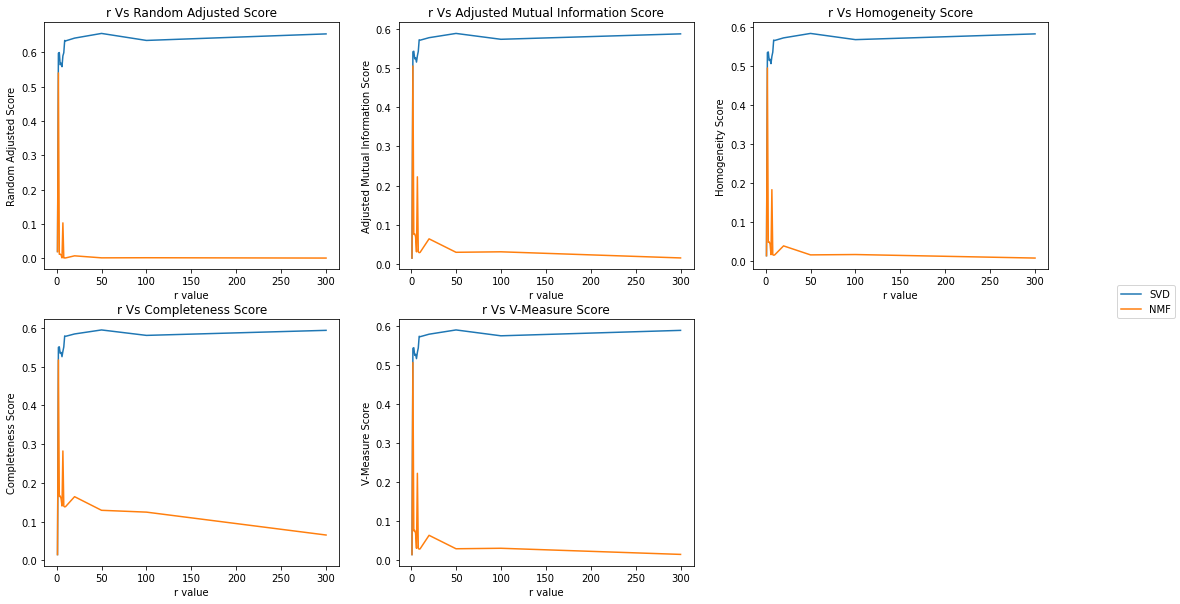

In [ ]:
# plot metrics vs r
fig = plt.figure(figsize=(18, 10))
axes = fig.subplots(nrows=2, ncols=3)

axes[0, 0].plot(r,svd_adj_rand_score, label='SVD')
axes[0, 0].plot(r,nmf_adj_rand_score, label='NMF')
axes[0, 0].title.set_text('r Vs Random Adjusted Score')
axes[0, 0].set_xlabel('r value')
axes[0, 0].set_ylabel('Random Adjusted Score')

axes[0, 1].plot(r,svd_mutual_score, label='SVD')
axes[0, 1].plot(r,nmf_mutual_score, label='NMF')
axes[0, 1].title.set_text('r Vs Adjusted Mutual Information Score')
axes[0, 1].set_xlabel('r value')
axes[0, 1].set_ylabel('Adjusted Mutual Information Score')

axes[0, 2].plot(r,svd_hom_score, label='SVD')
axes[0, 2].plot(r,nmf_hom_score, label='NMF')
axes[0, 2].title.set_text('r Vs Homogeneity Score')
axes[0, 2].set_xlabel('r value')
axes[0, 2].set_ylabel('Homogeneity Score')

axes[1, 0].plot(r,svd_comp_score, label='SVD')
axes[1, 0].plot(r,nmf_comp_score, label='NMF')
axes[1, 0].title.set_text('r Vs Completeness Score')
axes[1, 0].set_xlabel('r value')
axes[1, 0].set_ylabel('Completeness Score')

axes[1, 1].plot(r,svd_v_score, label='SVD')
axes[1, 1].plot(r,nmf_v_score, label='NMF')
axes[1, 1].title.set_text('r Vs V-Measure Score')
axes[1, 1].set_xlabel('r value')
axes[1, 1].set_ylabel('V-Measure Score')

axes[1, 2].axis('off')

fig.legend(['SVD','NMF'], loc='center right')

plt.show()


In [ ]:
import statistics
from statistics import mode

# find best r value for svd and nmf
svd_score=[svd_adj_rand_score, svd_mutual_score, svd_hom_score, svd_comp_score, svd_v_score]
argmaxes=[]
for i in svd_score:
    argmaxes.append(i.index(max(i)))
svd_bestr_ind=round(mode(argmaxes))
print('Best SVD r value: ',r[svd_bestr_ind])

nmf_score=[nmf_adj_rand_score, nmf_mutual_score, nmf_hom_score, nmf_comp_score, nmf_v_score]
argmaxes=[]
for i in nmf_score:
    argmaxes.append(i.index(max(i)))
nmf_bestr_ind=round(mode(argmaxes))
print('Best NMF r value: ',r[nmf_bestr_ind])

Best SVD r value:  50
Best NMF r value:  2


### Question 6

***How do you explain the non-monotonic behavior of the measures as r increases?***

While dimensionality reduction can help us work with noisy data and to reduce algorithm run time, it may also cause the data to lose information such as noise. So as r initially increases, our Kmeans clusters may be inaccurate as we truncated too much of the data; however, as r increases, we may see the scores begin to increase and then decrease. This initial increase implies we have a good trade off between the scores and how much of the data was truncated. The eventual decrease can imply that as our truncated data gets larger, more noise is being introduced; this can lead to an inaccurate clustering by Kmeans and the decreased score. Therefore, due to this, we can see the non-monotonic behaviour of the measures as r increases. 

### QUESTION 7

***Are these measures on average better than those computed in Question 3?***
- The average measures for the SVD and NMF metrics are shown below. Both performed worse than those computed in Question 3; however, the SVD metrics are a lot closer to those computed in Question 3 than using the NMF. 

In [ ]:
# print average metrics
print("SVD Metrics: ")
print("Homogeneity: ", np.mean(svd_hom_score))
print("Completeness: ",np.mean(svd_comp_score))
print("V-measure: ", np.mean(svd_v_score))
print("Adjusted Rand-Index: ", np.mean(svd_adj_rand_score))
print("Adjusted Mutual Information: ", np.mean(svd_mutual_score))

print("\nNMF Metrics: ")
print("Homogeneity: ", np.mean(nmf_hom_score))
print("Completeness: ",np.mean(nmf_comp_score))
print("V-measure: ", np.mean(nmf_v_score))
print("Adjusted Rand-Index: ", np.mean(nmf_adj_rand_score))
print("Adjusted Mutual Information: ", np.mean(nmf_mutual_score))

SVD Metrics: 
Homogeneity:  0.5086295760481007
Completeness:  0.5226573391383235
V-measure:  0.515542491271773
Adjusted Rand-Index:  0.567182526171996
Adjusted Mutual Information:  0.5154676533294706

NMF Metrics: 
Homogeneity:  0.0704770686887141
Completeness:  0.16756615651774417
V-measure:  0.08748731407893089
Adjusted Rand-Index:  0.051330192251747724
Adjusted Mutual Information:  0.08726492696038733


### QUESTION 8
***Visualize the clustering results for:***
- ***SVD with your optimal choice of r for K-Means clustering***
- ***NMF with your choice of r for K-Means clustering.***

The clustering results are shown below.

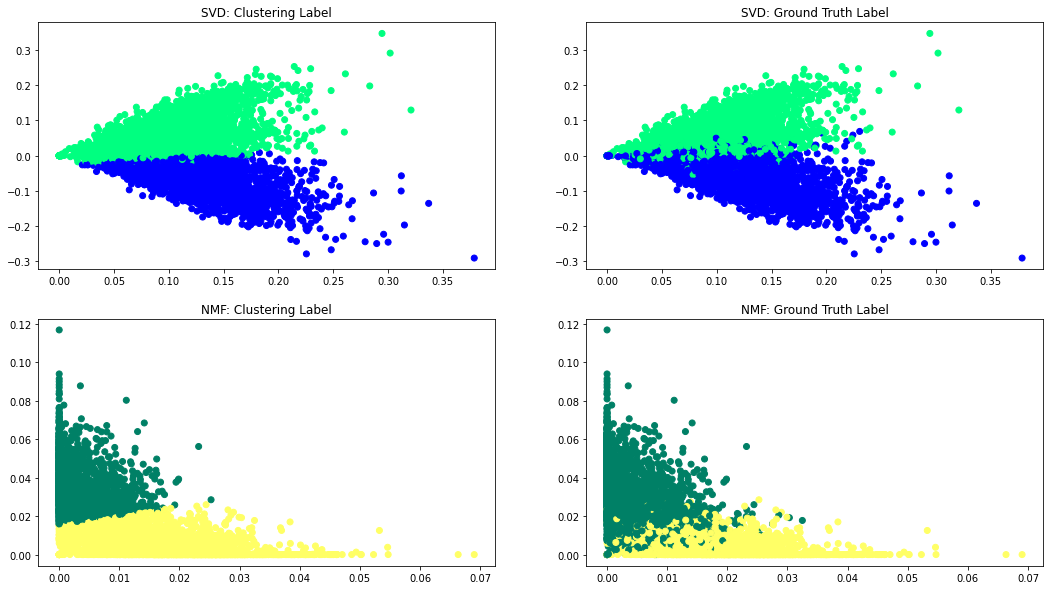

In [ ]:
# plot clustering results
svd_50 = TruncatedSVD(n_components=50, random_state=0)
trunc_svd = svd_50.fit_transform(newsgroups_tfidf)

nmf_2 = NMF(n_components=2, random_state=0, init='random', max_iter=500)
trunc_nmf = nmf_2.fit_transform(newsgroups_tfidf)

fig = plt.figure(figsize=(18, 10))
axes = fig.subplots(nrows=2, ncols=2)

kmeans.fit(trunc_svd)
axes[0, 0].scatter(trunc_svd[:,0], trunc_svd[:,1],c=kmeans.labels_, cmap=plt.cm.winter)
axes[0, 0].title.set_text('SVD: Clustering Label')

axes[0, 1].scatter(trunc_svd[:,0], trunc_svd[:,1],c=category_to_class, cmap=plt.cm.winter)
axes[0, 1].title.set_text('SVD: Ground Truth Label')

kmeans.fit(trunc_nmf)
axes[1, 0].scatter(trunc_nmf[:,0], trunc_nmf[:,1],c=kmeans.labels_, cmap=plt.cm.summer)
axes[1, 0].title.set_text('NMF: Clustering Label')

axes[1, 1].scatter(trunc_nmf[:,0], trunc_nmf[:,1],c=category_to_class, cmap=plt.cm.summer)
axes[1, 1].title.set_text('NMF: Ground Truth Label')

### QUESTION 9
***What do you observe in the visualization? How are the data points of the two classes distributed? Is distribution of the data ideal for K-Means clustering?***
- Based on the plots above, it appears that the labels for clustering and the groung truth are generally very similar; however, the ground truth labels imply that there is a good amount of overlap between the labels. This is not shown in the clustering label plot for NMF and SVD as there is a more clear cut line between the two labels. The data does not have a spherical distribution and are instead distributed in more of a triangular shape with centroids for each label close to each other. There are also a few outliers that are farther away from the main cluster. Since K-Means clustering assumes that there is a spherical distribution, the data distribution is not ideal. 

### QUESTION 10

***Load documents with the same configuration as in Question 1, but for ALL 20 categories. Construct the TF-IDF matrix, reduce its dimensionality using BOTH NMF and SVD (specify settings you choose and why), and perform K-Means clustering with k=20. Visualize the contingency matrix and report the five clustering metrics (DO BOTH NMF AND SVD).***
- The contingency matrix and metrics are shown below. To find the best r value for the NMF and SVD, the top 5 scoring r values for each metric were recorded. Among these r values, the most occuring value was chosen. In the case of finding the best r value for the SVD, while r=8 occured the most, we chose r=20 since it scored 2nd best more often compared to the other r values. Although r=8 did occur more often, it usually scored in 5th place, so it did not perform better than r=20 on average. For the NMF, the best r value was r=50. 

In [10]:
# load data
newsgroups = fetch_20newsgroups(remove=('headers', 'footers'))

# count vectorizer on corpus
tf_vectorizer = CountVectorizer(min_df = 3, stop_words='english')
newsgroups_vectorized = tf_vectorizer.fit_transform(newsgroups.data)

# count vector to TF-IDF
transformer = TfidfTransformer()
newsgroups_tfidf = transformer.fit_transform(newsgroups_vectorized)

kmeans = KMeans(random_state=0, n_clusters=20, max_iter=1000, n_init=30)

In [ ]:
import pandas as pd 

# search for best r value for SVD
r = [1,2,3,4,5,6,7,8,9,10,20,50,100,300]
svd_adj_rand_score, svd_mutual_score, svd_hom_score, svd_comp_score, svd_v_score = SVD_score(r,20,newsgroups_tfidf, newsgroups.target)

svd_score=[svd_adj_rand_score, svd_mutual_score, svd_hom_score, svd_comp_score, svd_v_score]
argmaxes=[]
for i in svd_score:
    sort=list(np.argsort(i))
    sort.reverse()
    argmaxes.extend(sort[:5])
svd_top5_ind=np.array(argmaxes).reshape(5,-1)
print(svd_top5_ind) # print index value of r for top 5 scoring metrics

[[ 8  9  7  6  5]
 [13 10 11 12  7]
 [ 9 10  7 11 13]
 [12 13 11 10  7]
 [13 10 11 12  7]]


In [ ]:
svd_bestr = TruncatedSVD(n_components=20, random_state=0)
trunc_svd = svd_bestr.fit_transform(newsgroups_tfidf)
kmeans.fit(trunc_svd)

# print clustering measures
print('Best SVD metrics (n_components=20):')
print_cluster_metrics(newsgroups.target, kmeans.labels_)

Best SVD metrics (n_components=20):
Homogeneity:  0.3375148402474223
Completeness:  0.3915122526602102
V-measure:  0.3625138124414301
Adjusted Rand-Index:  0.11564055013672209
Adjusted Mutual Information Score:  0.3587736243093972


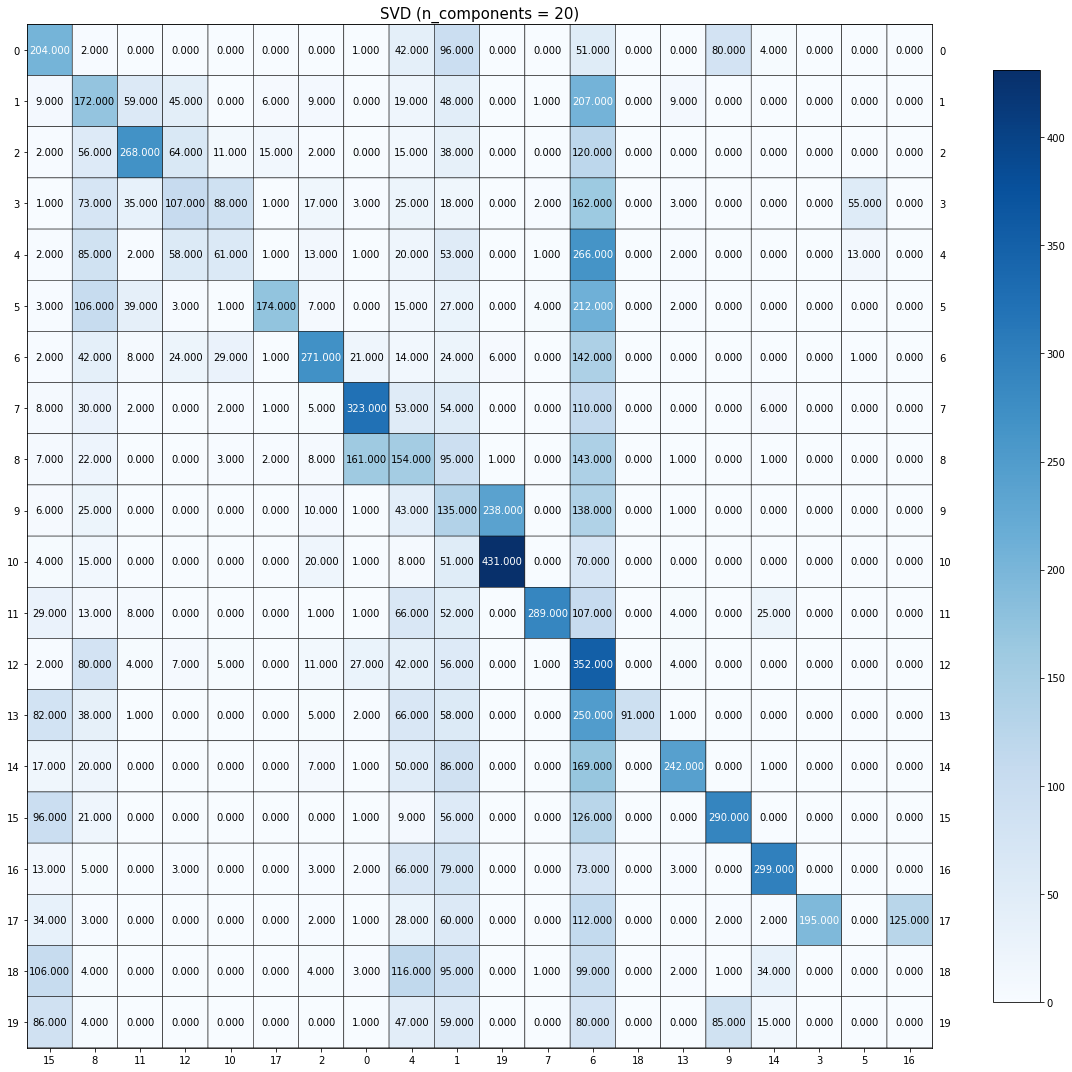

In [ ]:
from plotmat import plot_mat 
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import confusion_matrix

# plot confusion matrix
cm = confusion_matrix(newsgroups.target, kmeans.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(15,15), title='SVD (n_components = 20)')

In [ ]:
# search for best r value for NMF
r = [1,2,3,4,5,6,7,8,9,10,20,50,100,300]
nmf_adj_rand_score, nmf_mutual_score, nmf_hom_score, nmf_comp_score, nmf_v_score= NMF_score(r,20, newsgroups_tfidf, newsgroups.target)

nmf_score=[nmf_adj_rand_score, nmf_mutual_score, nmf_hom_score, nmf_comp_score, nmf_v_score]
argmaxes=[]
for i in nmf_score:
    argmaxes.append(i.index(max(i)))
nmf_bestr_ind=round(mode(argmaxes))
print('Best NMF r value: ',r[nmf_bestr_ind])

Best NMF r value:  50


In [ ]:
nmf_bestr = NMF(n_components=50, random_state=0, init='random', max_iter=500)
trunc_nmf = nmf_bestr.fit_transform(newsgroups_tfidf)
kmeans.fit(trunc_nmf)

# print clustering measures
print('Best NMF metrics (n_components=50):')
print_cluster_metrics(newsgroups.target, kmeans.labels_)

Best NMF metrics (n_components=50):
Homogeneity:  0.2760010367197732
Completeness:  0.42097610555511633
V-measure:  0.33341076635089767
Adjusted Rand-Index:  0.05119369194370699
Adjusted Mutual Information Score:  0.32892904653461336


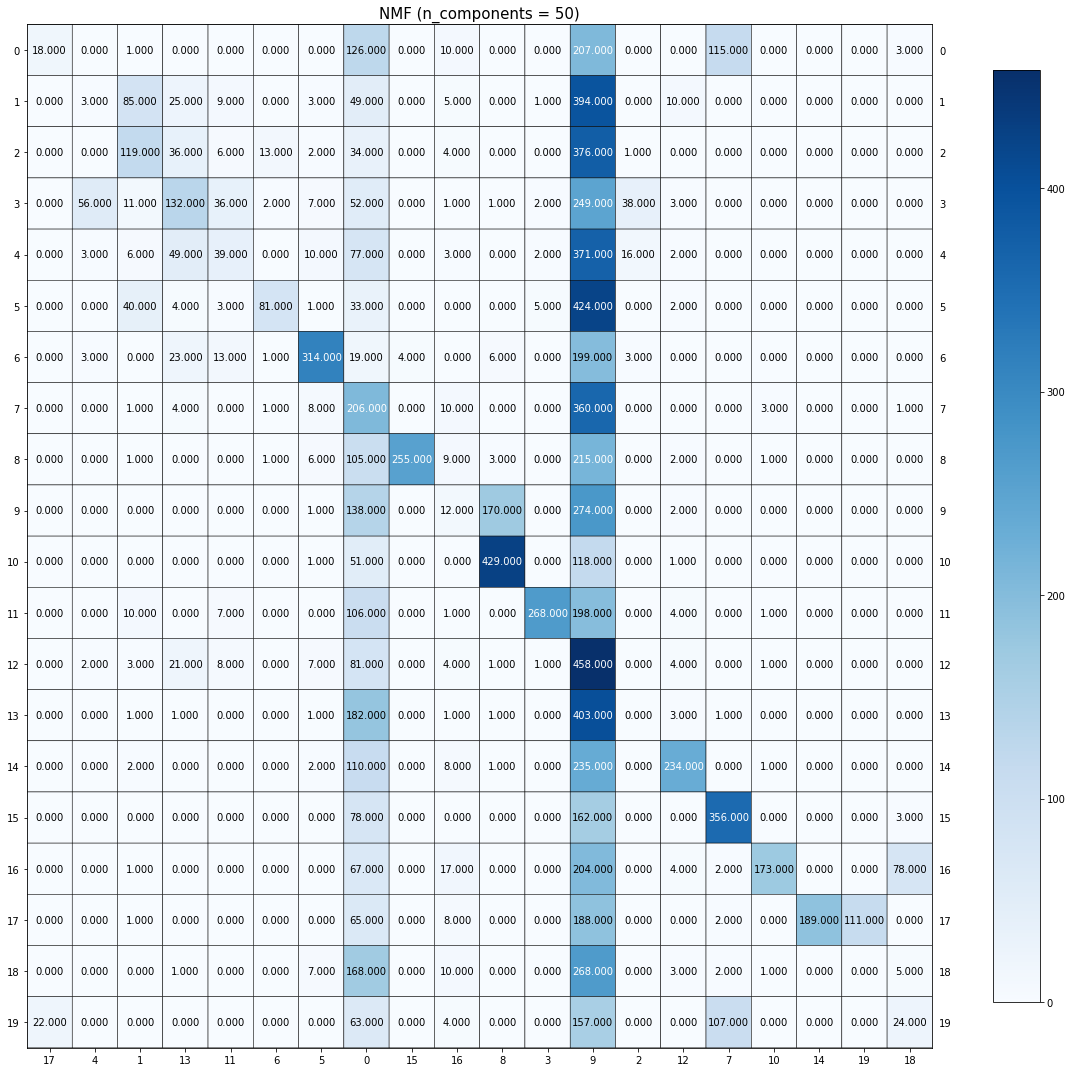

In [ ]:
# plot confusion matrix
cm = confusion_matrix(newsgroups.target, kmeans.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(15,15), title='NMF (n_components = 50)')

### QUESTION 11:
***Reduce the dimension of your dataset with UMAP. Consider the following settings: n components = [5, 20, 200], metric = ”cosine” vs. ”euclidean”. If ”cosine” metric fails, please look at the FAQ at the end of this spec. Report the permuted contingency matrix and the five clustering evaluation metrics
for the different combinations (6 combinations).***
- The 6 contingency matrices and their metrics are shown below.

In [14]:
import umap.umap_ as umap

def umap_conf_mat(tfidf, target, metric, n):
    print('\nUMAP Results using', metric,'& n_components =', n, ': ')
    umap_cosine = umap.UMAP(n_components=n, metric=metric, random_state=0)
    umap_trunc = umap_cosine.fit_transform(tfidf)

    kmeans = KMeans(random_state=0, n_clusters=20, max_iter=1000, n_init=30)
    kmeans.fit(umap_trunc)

    print_cluster_metrics(target, kmeans.labels_)

    cm = confusion_matrix(target, kmeans.labels_)
    rows, cols = linear_sum_assignment(cm, maximize=True)
    plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(15,15))


UMAP Results using cosine & n_components = 5 : 
Homogeneity:  0.5657783987469761
Completeness:  0.5832226235435638
V-measure:  0.574368091341958
Adjusted Rand-Index:  0.4398119211481499
Adjusted Mutual Information Score:  0.572012306720237


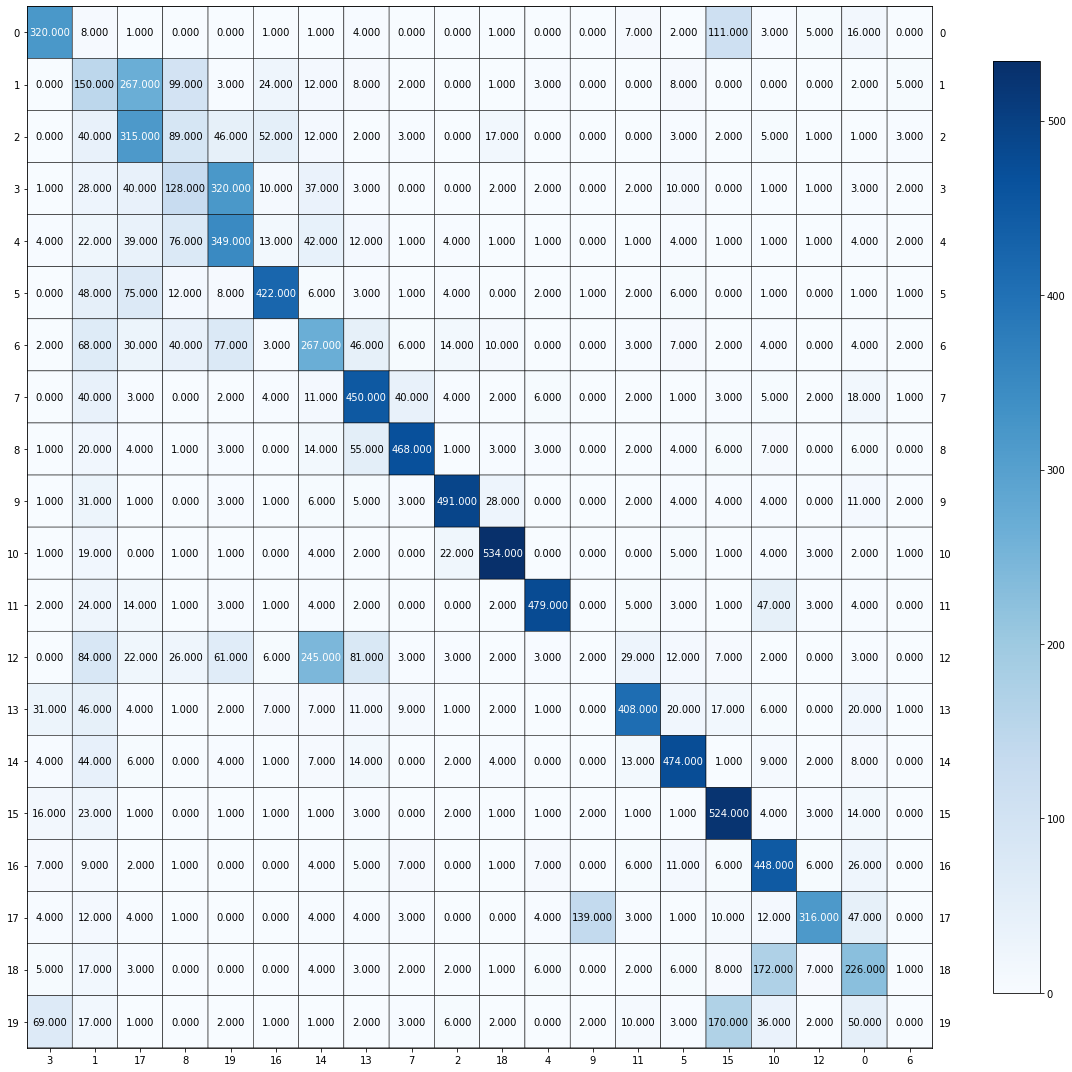


UMAP Results using cosine & n_components = 20 : 
Homogeneity:  0.5666243654495476
Completeness:  0.5839121209953368
V-measure:  0.5751383618604289
Adjusted Rand-Index:  0.4416886162604823
Adjusted Mutual Information Score:  0.5727872400153121


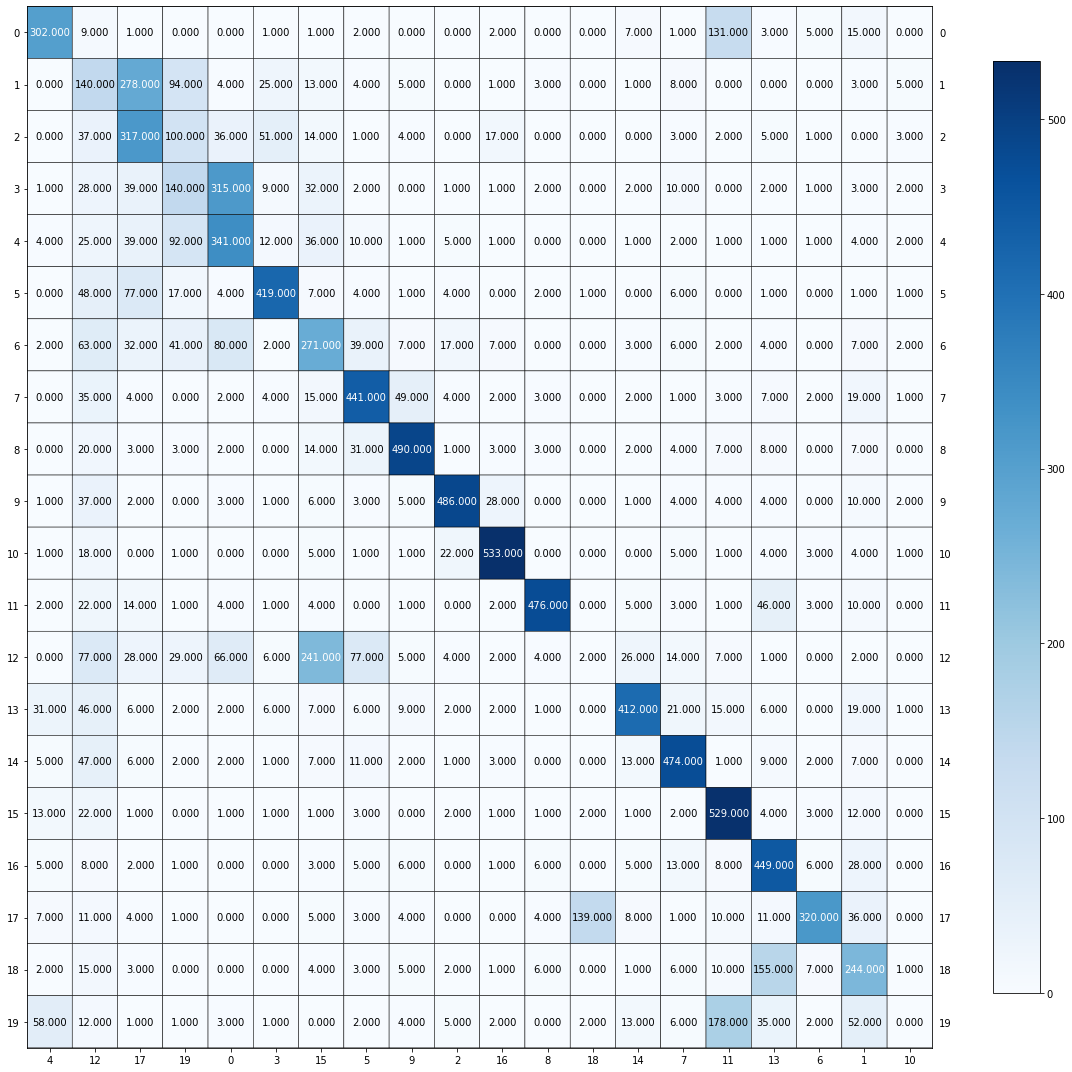


UMAP Results using cosine & n_components = 200 : 
Homogeneity:  0.5729025800113658
Completeness:  0.5967040622116844
V-measure:  0.5845611411620956
Adjusted Rand-Index:  0.44513079859249705
Adjusted Mutual Information Score:  0.5822491690223945


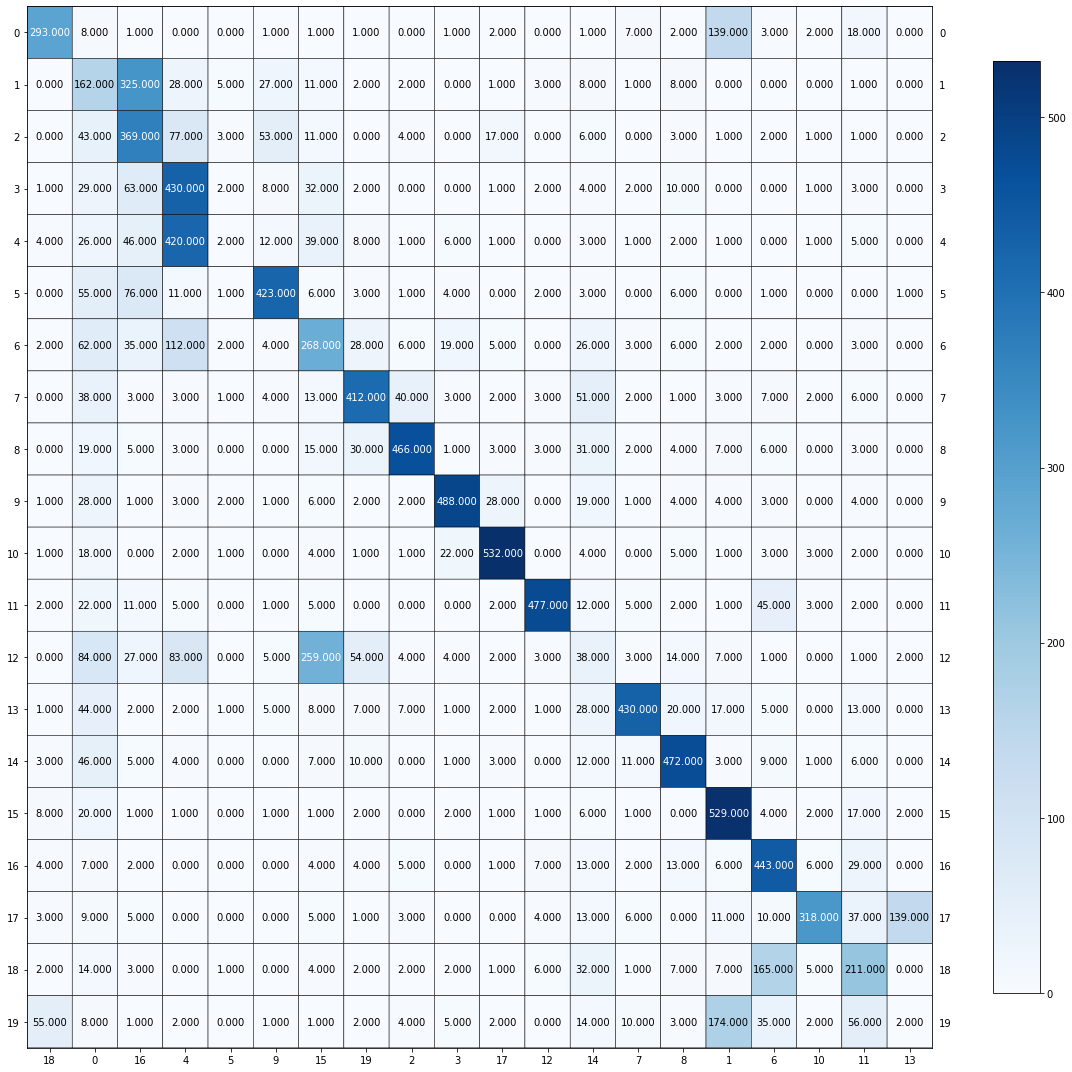

In [ ]:
for n in [5, 20, 200]:
    umap_conf_mat(newsgroups_tfidf, newsgroups.target, 'cosine', n)


UMAP Results using euclidean & n_components = 5 : 
Homogeneity:  0.008550105125850227
Completeness:  0.008590218955555269
V-measure:  0.008570115101119635
Adjusted Rand-Index:  0.0012058648969454344
Adjusted Mutual Information Score:  0.003201912319728761


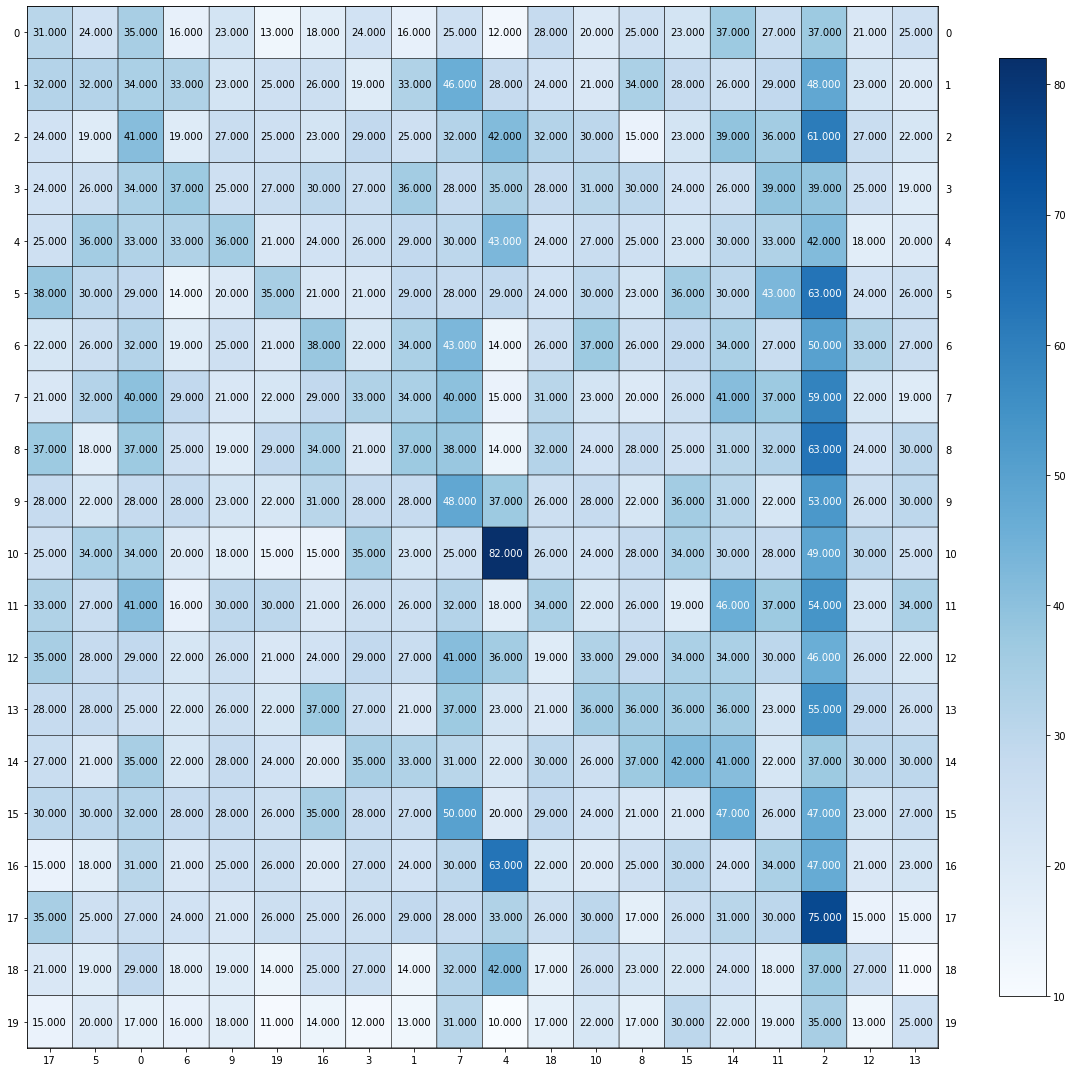


UMAP Results using euclidean & n_components = 20 : 
Homogeneity:  0.00858278999730706
Completeness:  0.008751460483524863
V-measure:  0.008666304618464281
Adjusted Rand-Index:  0.0009779127571098191
Adjusted Mutual Information Score:  0.003254335907100028


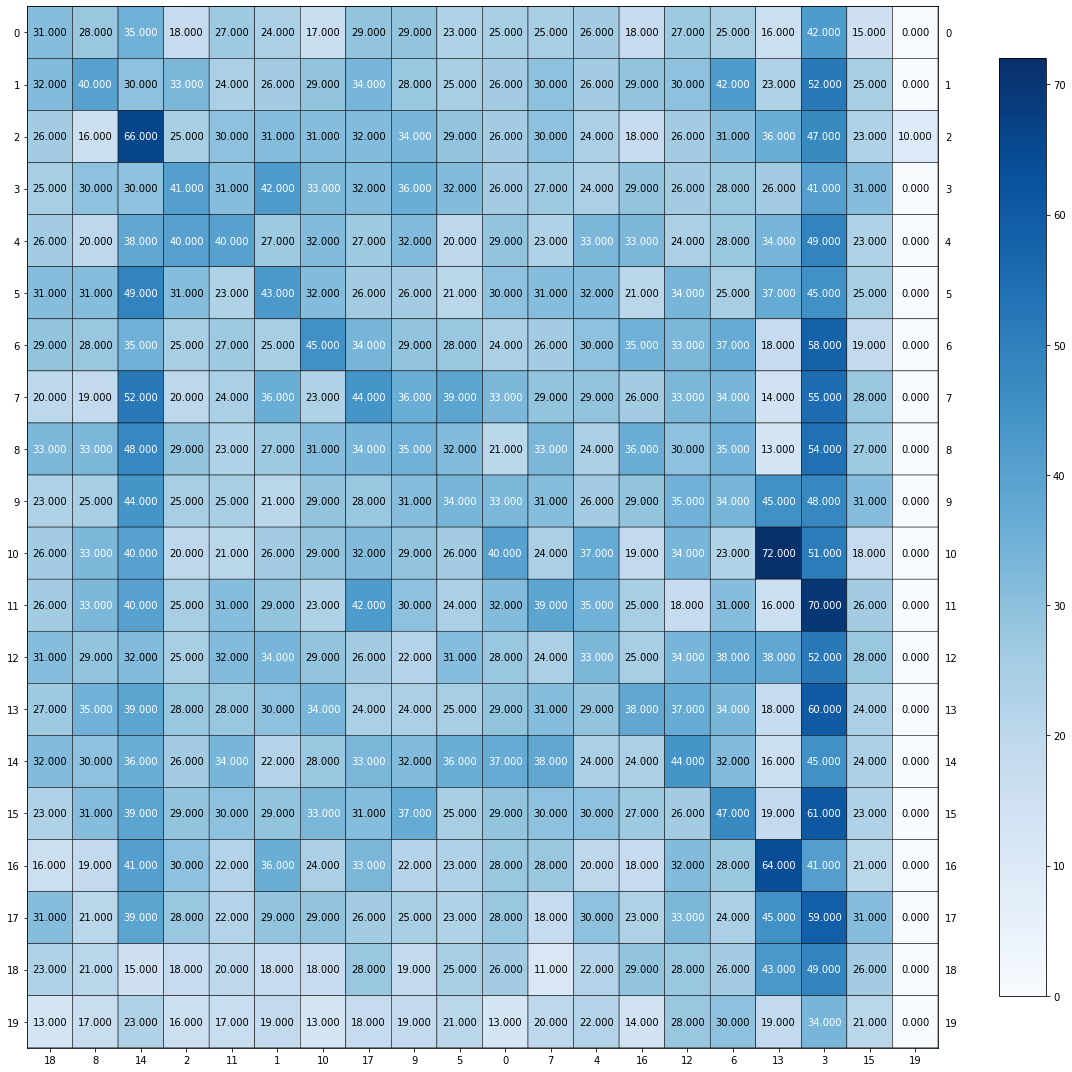


UMAP Results using euclidean & n_components = 200 : 
Homogeneity:  0.008358766144836919
Completeness:  0.00854518608745854
V-measure:  0.008450948179173893
Adjusted Rand-Index:  0.0008933207124191127
Adjusted Mutual Information Score:  0.003030411009856627


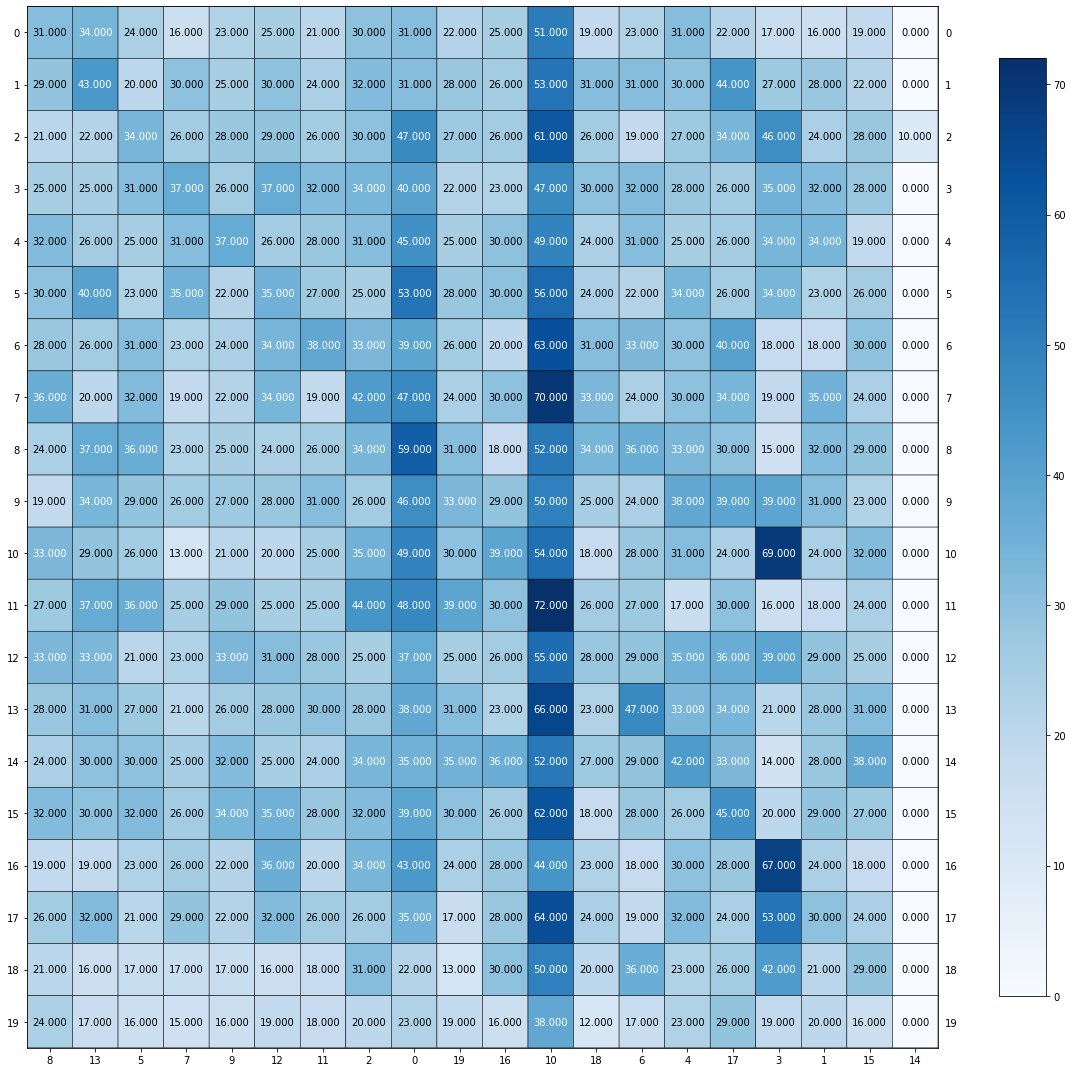

In [ ]:
for n in [5, 20, 200]:
    umap_conf_mat(newsgroups_tfidf, newsgroups.target, 'euclidean', n)

### QUESTION 12
***Analyze the contingency matrices. Which setting works best and why? What about for each metric choice?***
- In general, using `metric=cosine` for the UMAP dimensionality reduction, it was able to better split the data into clusters as seen from the strong diagonals in the contingency matrix. Additiontionally, most metrics scored above 0.5 for all n_components, except for the random adjusted score, which usually scored around 0.44. These all indicate that the UMAP method for dimensionality reduction performed better than using SVD/PCA and NMF for dimensionality reduction as these metrics were higher than the metrics for the PCA and NMF in those regards. This is particularly evident as there is a strongly diagonal in the contingency plots for all of the n_components; compared to the matrix for SVD/PCA and NMF, there are less coloured squares off the diagonal. Since the V-score is a combination of the completeness and homogeneity of the clusters, we used the highest V-score to determine the best n_component for UMAP, which is `n_components=200`.
- In contrast, the UMAP dimensionality reduction using `metric=euclidian` had homogeneity, completeness, v-measure, and adjusted random index scores close to 0 for all n_componenet values; this indicates it was doing a poorer job of classifying the dataset, especially compared to using PCA or NMF for dimensionality reduction. This is evident in how all 3 confusion matrixes have much of the data spread out; a good confusion matrix would show 20 strongly coloured squares in the plot. While `metric=euclidian` is a poor metric to use for UMAP in general, the best setting for it is `n_components=5` as the confusion matrix having less strongly coloured squares spread out across the matrix plot. This implies it does a slightly better of creating the clusters than the other n_component values. 
- Therefore, the better metric choice is `cosine`, specifically with `n_components=200`. 

### QUESTION 13

***So far, we have attempted K-Means clustering with 4 different representation
learning techniques (sparse TF-IDF representation, PCA-reduced, NMF-reduced, UMAP-reduced). Compare and contrast the clustering results across the 4 choices, and suggest an approach that is best for the K-Means clustering task on the 20-class text data. Choose any choice of clustering metrics for your comparison.***
- The UMAP reduced matrix with the `cosine` metric had the best performance with `n_components=200` due to the confusion matrix having the strong diagonal with a few coloured squares scattered around the plot; additionally, it had the highest V-measure score of 0.5845611411620956. In general, it also had the highest metrics. To compare the 4 different approaches, we will use the V measure score as it considers both the homogeneity and completeness score; the homogenity score describes how similar samples in a cluster are to each other and how many similar samples are clustered together. This metric will allow us to determine how well the clusters are formed. 
- Doing Kmeans with the `n_components=20` PCA/SVD reduced also resulted in a contingency matrix with a strong diagonal as well; however, there are more coloured squares outside the diagonal as well as a strongly coloured column. This implies that it is not able to cluster the data as well as using UMAP. This is evident from the V measure score (0.3625138124414301). 
- Doing the Kmeans clustering on just the TF-IDF matrix alone had similar results to that of the PCA reduced data as seen below. It again has a strong diagonal with many coloured squares outside the diagonal and along 1 column. This had a slightly higher V-measure score than that of using the PCA/SVD reduced data; this had a v measure score of 0.372655921450351. 
- Not considering the UMAP matrix with the `euclidian` matrix as it performed worse than the `cosine` metric, the NMF reduced data with `n_components=50` had the worst performace. This is evident based on the confusion matrix having a strongly coloured diagonal line as well as a very strongly coloured column. This column implies that most of the samples actually belong in the same cluster. It had the lowest v measure score of 0.33341076635089767. 
- Therefore, based on the V-measure score and the contingency matrix, the UMAP reduced matrix with the `cosine` metric and `n_components=200` is the best approach for the K-Means clustering task for the 20 classes.

Kmeans Clustering with TF-IDF matrix (no dimensionality reduction): 
Homogeneity:  0.3483560648768872
Completeness:  0.40060010276971214
V-measure:  0.372655921450351
Adjusted Rand-Index:  0.12391707104061779
Adjusted Mutual Information Score:  0.36900553632086724


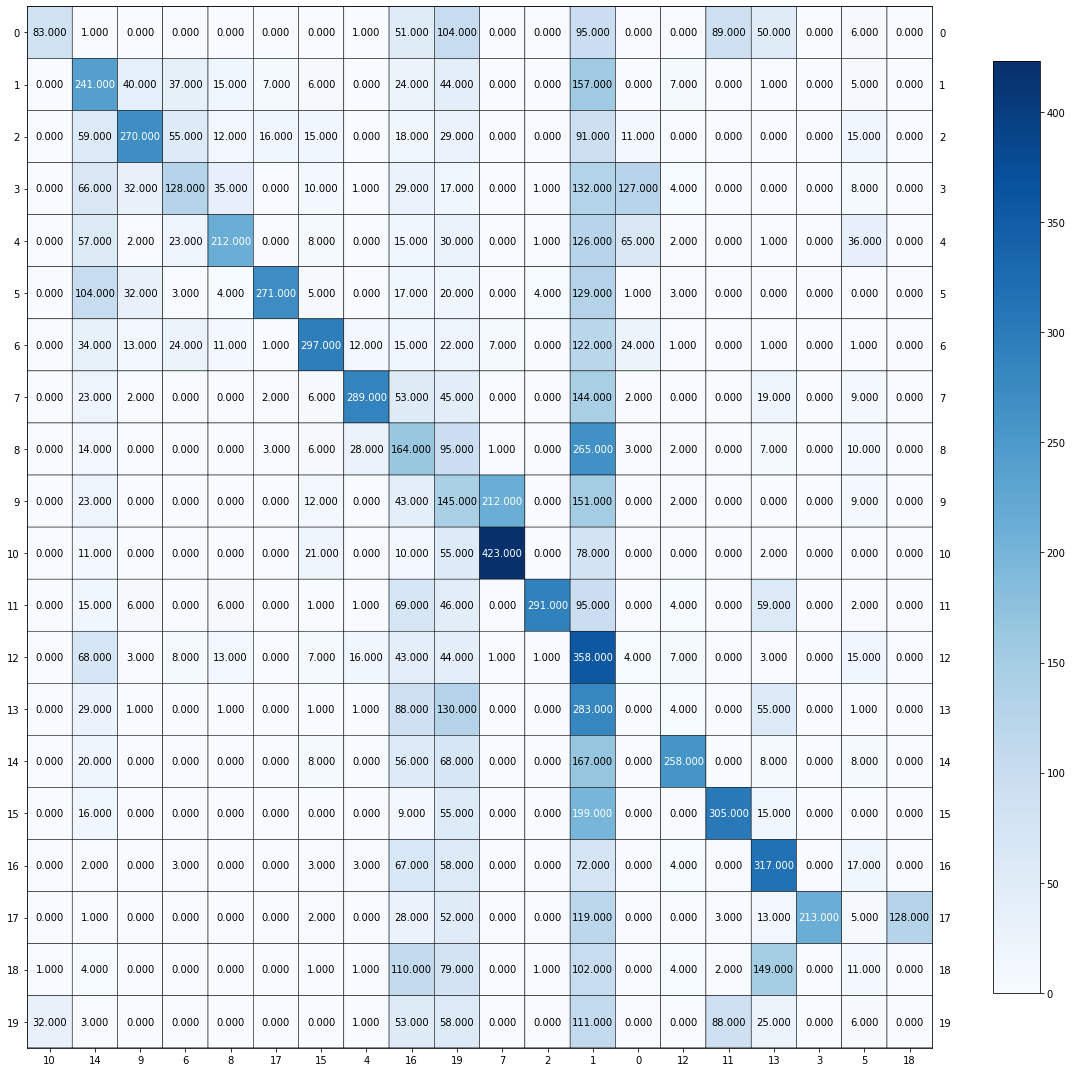

In [ ]:
print('Kmeans Clustering with TF-IDF matrix (no dimensionality reduction): ')
kmeans = KMeans(random_state=0, n_clusters=20, max_iter=1000, n_init=30)
kmeans.fit(newsgroups_tfidf)

# print clustering measures
print_cluster_metrics(newsgroups.target, kmeans.labels_)
cm = confusion_matrix(newsgroups.target, kmeans.labels_)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(15,15))

### QUESTION 14
***Use UMAP to reduce the dimensionality properly, and perform Agglomerative clustering with n_clusters=20 . Compare the performance of “ward” and “single”
linkage criteria. Report the five clustering evaluation metrics for each case.***
- The clustering metrics for each clustering is shown below. Using `ward` for the agglomerative linkage caused the metrics to score much higher than using `single`. The V-measure using `ward` was 0.5641856003057707 while it was only 0.043129988383942025 using `single`; therefore, since the V-measure score was much higher, `ward` is the better setting to use for Agglomerative clustering.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

umap_cosine = umap.UMAP(n_components=200, metric='cosine', random_state=0)
umap_trunc = umap_cosine.fit_transform(newsgroups_tfidf)

ward_clustering = AgglomerativeClustering(n_clusters=20, linkage='ward')
ward_clusted = ward_clustering.fit(umap_trunc)

print("Agglomerative Clustering using 'ward' metrics: ")
print_cluster_metrics(newsgroups.target, ward_clusted.labels_)

Agglomerative Clustering using 'ward' metrics: 
Homogeneity:  0.5522500964188669
Completeness:  0.576648412745889
V-measure:  0.5641856003057707
Adjusted Rand-Index:  0.41426869629681506
Adjusted Mutual Information Score:  0.5617569084570813


In [ ]:
single_clustering = AgglomerativeClustering(n_clusters=20, linkage='single')
single_clusted = single_clustering.fit(umap_trunc)

print("Agglomerative Clustering using 'single' metrics: ")
print_cluster_metrics(newsgroups.target, single_clusted.labels_)

Agglomerative Clustering using 'single' metrics: 
Homogeneity:  0.02282738819580067
Completeness:  0.3899515463214556
V-measure:  0.043129988383942025
Adjusted Rand-Index:  0.0007562023441883578
Adjusted Mutual Information Score:  0.036191687492805026


### QUESTION 15
***Apply HDBSCAN on UMAP-transformed 20-category data. Use min_cluster_size=100. Vary the min cluster size among 20, 100, 200 and report your findings in terms of the five clustering evaluation metrics - you will plot the best contingency matrix in the next question. Feel free to try modifying other parameters in HDBSCAN to get better performance.***
- The metrics for the `n_components=200` , metrics='cosine', and the various min cluster size are shown below. Based on the V-score, the settings with the highest V-score is UMAP with `metric=cosine`, `n_components=200`, and `min_cluster_size =  100`. It also scored the highest in general for all the metrics compared to the other min_cluster_size values.
- For `min_cluster_size=20`, it scored very close to 0 for all metrics which indicates it does a poor job of clustering the data. 
- Using `min_cluster_size=200`, it scored very comparable to `min_cluster_size=20`, but it scored slightly lower than it in all the metrics. 

In [16]:
import hdbscan
from joblib import Memory
from tempfile import mkdtemp

# Make code run much faster
cachedir = mkdtemp()
memory = Memory(location=cachedir, verbose=False)

def HDBSCAN_cluster_size_plot(n_component, min_cluster_sizes, tfidf, target, metric):
  v_measure_score = []
  for m in min_cluster_sizes:
    umap_cosine = umap.UMAP(n_components=n_component, metric=metric, random_state=0)
    umap_trunc = umap_cosine.fit_transform(tfidf)
    
    clusterers = hdbscan.HDBSCAN(min_cluster_size=m, gen_min_span_tree=True, memory=memory)
    cluster_data = clusterers.fit_predict(umap_trunc)
    
    x = cluster.v_measure_score(target, cluster_data)
    
    print("\nResults for n_components = ", n_component, "min_cluster_size = ", m, ":")
    print_cluster_metrics(target, cluster_data)
    
    # V-measure: harmonic mean of homogeneity and completeness:
    v_measure_score.append(x)
            
  max_score = max(v_measure_score)
  index = v_measure_score.index(max_score)
  
  print("\nThe best choice for min_cluster_size = ", min_cluster_sizes[index])

In [17]:
min_cluster_size = [20, 100, 200]
HDBSCAN_cluster_size_plot(200, min_cluster_size, newsgroups_tfidf, newsgroups.target, 'cosine')


Results for n_components =  200 min_cluster_size =  20 :
Homogeneity:  0.00045198103683443617
Completeness:  0.0999070111919081
V-measure:  0.0008998909515278226
Adjusted Rand-Index:  -7.490677862915139e-06
Adjusted Mutual Information Score:  0.0002479714824281889

Results for n_components =  200 min_cluster_size =  100 :
Homogeneity:  0.37798563576489386
Completeness:  0.6117773402624369
V-measure:  0.4672695433280535
Adjusted Rand-Index:  0.16843097031573415
Adjusted Mutual Information Score:  0.4655850620483076

Results for n_components =  200 min_cluster_size =  200 :
Homogeneity:  0.3501470159847839
Completeness:  0.5940384648450321
V-measure:  0.44059308275502046
Adjusted Rand-Index:  0.1507009713528879
Adjusted Mutual Information Score:  0.4389962175628892

The best choice for min_cluster_size =  100


### QUESTION 16
***Plot the contingency matrix for the best clustering model from Question 15.
How many clusters are given by the model? What does “-1” mean for the clustering labels? Interpret the contingency matrix considering the answer to these questions.***
- The contingency matrix for the best clustering model is shown below. The model gives 10 clusters. The `-1` label indicates the samples that belong to that class maybe noise or outliers. Based on the contingency plot below, there do not appear to be any outliers in the data. However, since it is not creating 20 clusters, it is not the best method to use to cluster the data. 

<Figure size 432x288 with 0 Axes>

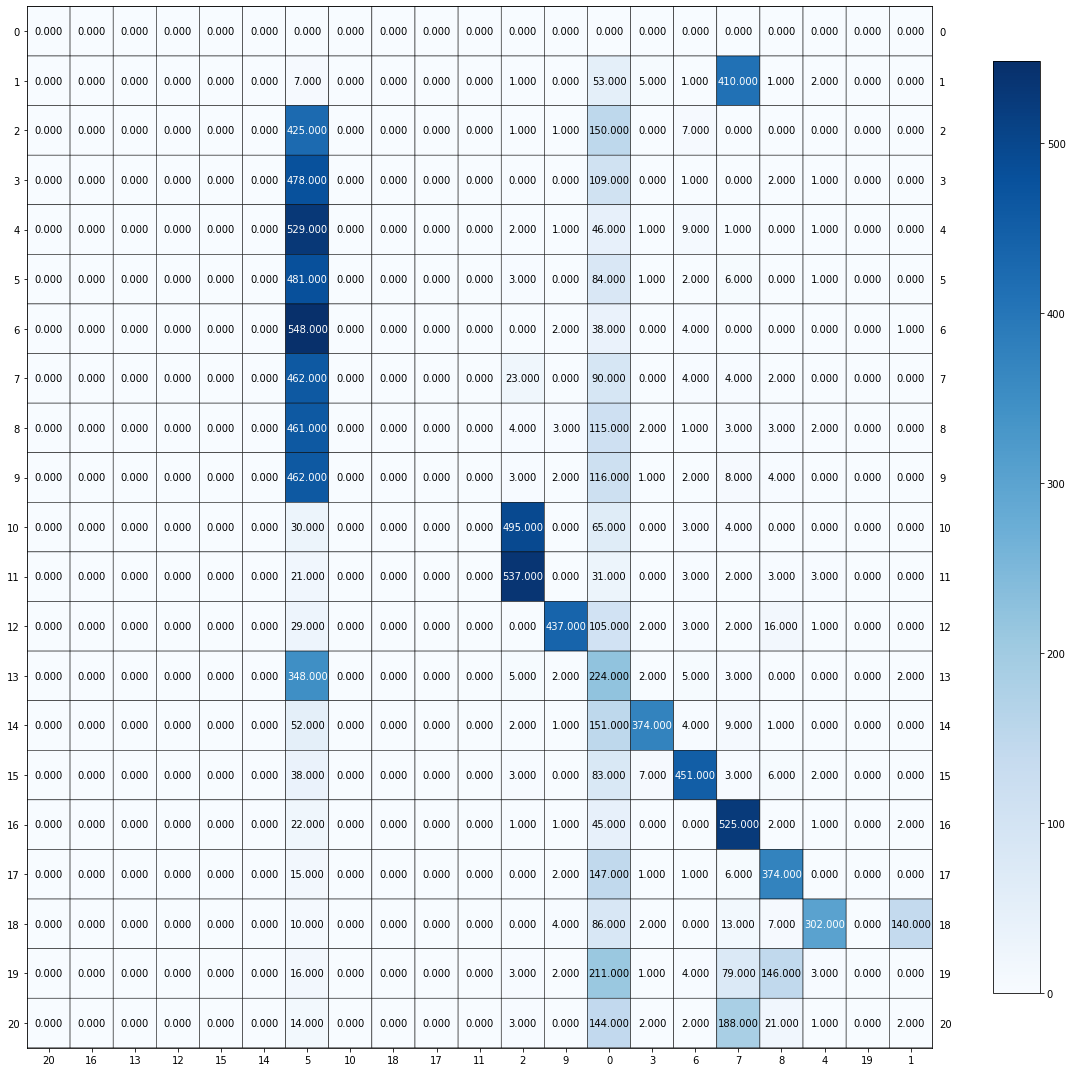

In [19]:
plt.figure()
umap_cosine = umap.UMAP(n_components=200, metric='cosine', random_state=0)
umap_trunc = umap_cosine.fit_transform(newsgroups_tfidf)

clusterers = hdbscan.HDBSCAN(min_cluster_size=100)

cluster_data = clusterers.fit_predict(umap_trunc)

cm = confusion_matrix(newsgroups.target, cluster_data)
rows, cols = linear_sum_assignment(cm, maximize=True)
plot_mat(cm[rows[:, np.newaxis], cols], xticklabels=cols,yticklabels=rows, size=(15,15))

### QUESTION 17
***Based on your experiments, which dimensionality reduction technique and clustering methods worked best together for 20-class text data and why? Follow the table below. If UMAP takes too long to converge, consider running it once and saving the intermediate results in a pickle file. Hint: DBSCAN and HDBSCAN do not accept the number of clusters as an input parameter. So pay close attention to how the different clustering metrics are being computed for these methods.***

| Module | Alternatives | Hyperparameters |
| --- | --- | --- |
| Dimensionality Reduction | None | N/A |
| Dimensionality Reduction | SVD | $r = [5,20,200]$ |
| Dimensionality Reduction | NMF | $r = [5,20,200]$ |
| Dimensionality Reduction | UMAP | n_components $ = [5,20,200]$ |
| Clustering | K-Means | $k = [10,20,50]$ |
| Clustering | Agglomerative Clustering | n_clusters $ = [20]$ |
| Clustering | HDBSCAN | min_cluster_size $ = [100,200]$ |

- Based on the highest V-Score, we chose the UMAP dimensionality reduction technique with `n-components = 200` and the K-Means clustering technique with `k = 50`. We chose the V-score as the metric as it combines both the completeness and homogeniety score. A high V score indicates that the cluster created contains samples that mainly the same label and samples with the same label are mainly in a cluster. Therefore, a good dimensionality reduction technique and clustering method combination should be able to create distinct clusters that each contain samples of a single class. A bad clustering method would have clusters that each have samples that belong to multiple classes. For this reason we based the best dimensionality reduction technique and clustering method combination on the highest V-score. 

In [ ]:
from scipy.sparse import csr_matrix

def find_best_combo(reducer, clustering_method, input, target):
  dictionary = {}
  array = [5, 20, 200]

  # reduce dimensionality
  for i in array:
    if reducer == "SVD":
        svd = TruncatedSVD(n_components = i, random_state=0)
        data = svd.fit_transform(input)
    elif reducer == "NMF":
        nmf = NMF(n_components= i, init='random', random_state=0, max_iter=300)
        data = nmf.fit_transform(input)
    elif reducer == "UMAP":
        umap_cosine = umap.UMAP(n_components= i, metric='cosine', random_state=0)
        data = umap_cosine.fit_transform(input)
    else:
        data = input.todense()

    # clustering
    if clustering_method == 'KMeans':
      for j in [10, 20, 50]:
        All_score = []
        adj_rand_score, adj_mutual_score, hom_score, comp_score, v_score = [], [], [], [], []
        kmeans = KMeans(random_state=0, n_clusters=j, max_iter=1000, n_init=30)
        kmeans.fit(data)

        adj_rand_score.append(cluster.adjusted_rand_score(target,kmeans.labels_)) # get scores
        adj_mutual_score.append(cluster.adjusted_mutual_info_score(target, kmeans.labels_))
        hom_score.append(cluster.homogeneity_score(target,kmeans.labels_))
        comp_score.append(cluster.completeness_score(target,kmeans.labels_))
        v_score.append(cluster.v_measure_score(target,kmeans.labels_))

        All_score.append(adj_rand_score)
        All_score.append(adj_mutual_score)
        All_score.append(hom_score)
        All_score.append(comp_score)
        All_score.append(v_score)

        # save data
        String = reducer + "_r_" + str(i) + "_" + 'KMeans'+"_k_"+str(j)
        dictionary[String] = All_score

      if reducer == 'None':
        break
    
    elif clustering_method == 'Agglomerative':
      All_score = []
      adj_rand_score, adj_mutual_score, hom_score, comp_score, v_score = [], [], [], [], []

      Agglomerative = AgglomerativeClustering(n_clusters=20, linkage='ward')
      Agglomerative.fit(data)
      
      adj_rand_score.append(cluster.adjusted_rand_score(target,Agglomerative.labels_)) # get scores
      adj_mutual_score.append(cluster.adjusted_mutual_info_score(target, Agglomerative.labels_))
      hom_score.append(cluster.homogeneity_score(target,Agglomerative.labels_))
      comp_score.append(cluster.completeness_score(target,Agglomerative.labels_))
      v_score.append(cluster.v_measure_score(target,Agglomerative.labels_))

      All_score.append(adj_rand_score)
      All_score.append(adj_mutual_score)
      All_score.append(hom_score)
      All_score.append(comp_score)
      All_score.append(v_score)

      # save data
      String = reducer + "_r_" + str(i) + "_" + 'Agglomerative'
      dictionary[String] = All_score

      if reducer == 'None':
        break
    
    else:    
      for j in [100, 200]:
          All_score = []
          adj_rand_score, adj_mutual_score, hom_score, comp_score, v_score = [], [], [], [], [] 

          clusterers = hdbscan.HDBSCAN(min_cluster_size=j)
          cluster_data = clusterers.fit_predict(data)

          adj_rand_score.append(cluster.adjusted_rand_score(target,cluster_data)) # get scores
          adj_mutual_score.append(cluster.adjusted_mutual_info_score(target, cluster_data))
          hom_score.append(cluster.homogeneity_score(target,cluster_data))
          comp_score.append(cluster.completeness_score(target,cluster_data))
          v_score.append(cluster.v_measure_score(target,cluster_data))

          All_score.append(adj_rand_score)
          All_score.append(adj_mutual_score)
          All_score.append(hom_score)
          All_score.append(comp_score)
          All_score.append(v_score)

          # save data
          String = reducer + "_r_" + str(i) + "_" + 'HDBSCAN'+"_min_cluster_"+str(j)
          dictionary[String] = All_score
      if reducer == 'None':
        break
  max_v_score=0
  max_combo=0
  for key in dictionary:
    print('Reduce Dimensionality Type and Clustering Type: ', key, '  V-score: ', dictionary[key][4])
    if dictionary[key][4][0]>max_v_score:
      max_v_score = dictionary[key][4][0]
      max_combo = key
  print('\nBest Combination: ', max_combo, '  Best V score: ', max_v_score, '\n')

In [ ]:
find_best_combo('SVD', 'KMeans', newsgroups_tfidf, newsgroups.target)
find_best_combo('NMF', 'KMeans', newsgroups_tfidf, newsgroups.target)
find_best_combo('UMAP', 'KMeans', newsgroups_tfidf, newsgroups.target)

Reduce Dimensionality Type and Clustering Type:  SVD_r_5_KMeans_k_10   V-score:  [0.3114377057988075]
Reduce Dimensionality Type and Clustering Type:  SVD_r_5_KMeans_k_20   V-score:  [0.31983642645338417]
Reduce Dimensionality Type and Clustering Type:  SVD_r_5_KMeans_k_50   V-score:  [0.3285162641680381]
Reduce Dimensionality Type and Clustering Type:  SVD_r_20_KMeans_k_10   V-score:  [0.3199992254536002]
Reduce Dimensionality Type and Clustering Type:  SVD_r_20_KMeans_k_20   V-score:  [0.3625138124414301]
Reduce Dimensionality Type and Clustering Type:  SVD_r_20_KMeans_k_50   V-score:  [0.4028009908574072]
Reduce Dimensionality Type and Clustering Type:  SVD_r_200_KMeans_k_10   V-score:  [0.3851087930265345]
Reduce Dimensionality Type and Clustering Type:  SVD_r_200_KMeans_k_20   V-score:  [0.3386966122897146]
Reduce Dimensionality Type and Clustering Type:  SVD_r_200_KMeans_k_50   V-score:  [0.4166696630733756]

Best Combination:  SVD_r_200_KMeans_k_50   Best V score:  0.41666966307

In [ ]:
find_best_combo('SVD', 'Agglomerative', newsgroups_tfidf, newsgroups.target)
find_best_combo('NMF', 'Agglomerative', newsgroups_tfidf, newsgroups.target)
find_best_combo('UMAP', 'Agglomerative', newsgroups_tfidf, newsgroups.target)

Reduce Dimensionality Type and Clustering Type:  SVD_r_5_Agglomerative   V-score:  [0.3198295117469532]
Reduce Dimensionality Type and Clustering Type:  SVD_r_20_Agglomerative   V-score:  [0.39133819798199715]
Reduce Dimensionality Type and Clustering Type:  SVD_r_200_Agglomerative   V-score:  [0.38968040777150076]

Best Combination:  SVD_r_200_Agglomerative   Best V score:  0.39133819798199715 

Reduce Dimensionality Type and Clustering Type:  NMF_r_5_Agglomerative   V-score:  [0.2841988875365863]
Reduce Dimensionality Type and Clustering Type:  NMF_r_20_Agglomerative   V-score:  [0.3790981890914451]
Reduce Dimensionality Type and Clustering Type:  NMF_r_200_Agglomerative   V-score:  [0.2178477569191343]

Best Combination:  NMF_r_200_Agglomerative   Best V score:  0.3790981890914451 

Reduce Dimensionality Type and Clustering Type:  UMAP_r_5_Agglomerative   V-score:  [0.5591471971979518]
Reduce Dimensionality Type and Clustering Type:  UMAP_r_20_Agglomerative   V-score:  [0.5681223644

In [ ]:
find_best_combo('SVD', 'HDBSCAN', newsgroups_tfidf, newsgroups.target)
find_best_combo('NMF', 'HDBSCAN', newsgroups_tfidf, newsgroups.target)
find_best_combo('UMAP', 'HDBSCAN', newsgroups_tfidf, newsgroups.target)

Reduce Dimensionality Type and Clustering Type:  SVD_r_5_HDBSCAN_min_cluster_100   V-score:  [0.0]
Reduce Dimensionality Type and Clustering Type:  SVD_r_5_HDBSCAN_min_cluster_200   V-score:  [0.0]
Reduce Dimensionality Type and Clustering Type:  SVD_r_20_HDBSCAN_min_cluster_100   V-score:  [0.0]
Reduce Dimensionality Type and Clustering Type:  SVD_r_20_HDBSCAN_min_cluster_200   V-score:  [0.0]
Reduce Dimensionality Type and Clustering Type:  SVD_r_200_HDBSCAN_min_cluster_100   V-score:  [0.0]
Reduce Dimensionality Type and Clustering Type:  SVD_r_200_HDBSCAN_min_cluster_200   V-score:  [0.0]

Best Combination:  SVD_r_200_HDBSCAN_min_cluster_200   Best V score:  0 

Reduce Dimensionality Type and Clustering Type:  NMF_r_5_HDBSCAN_min_cluster_100   V-score:  [0.11136552322386914]
Reduce Dimensionality Type and Clustering Type:  NMF_r_5_HDBSCAN_min_cluster_200   V-score:  [0.0]
Reduce Dimensionality Type and Clustering Type:  NMF_r_20_HDBSCAN_min_cluster_100   V-score:  [0.0]
Reduce Dime

In [ ]:
find_best_combo('None', 'KMeans', newsgroups_tfidf, newsgroups.target)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Reduce Dimensionality Type and Clustering Type:  None_r_5_KMeans_k_10   V-score:  [0.3547574123756163]
Reduce Dimensionality Type and Clustering Type:  None_r_5_KMeans_k_20   V-score:  [0.37260324542031015]
Reduce Dimensionality Type and Clustering Type:  None_r_5_KMeans_k_50   V-score:  [0.4079895900478735]

Best Combination:  None_r_5_KMeans_k_50   Best V score:  0.4079895900478735 



/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


In [ ]:
find_best_combo('None', 'HDBSCAN', newsgroups_tfidf, newsgroups.target)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Reduce Dimensionality Type and Clustering Type:  None_r_5_HDBSCAN_min_cluster_100   V-score:  [0.0]
Reduce Dimensionality Type and Clustering Type:  None_r_5_HDBSCAN_min_cluster_200   V-score:  [0.0]

Best Combination:  0   Best V score:  0 



In [ ]:
find_best_combo('None', 'Agglomerative', newsgroups_tfidf, newsgroups.target)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


Reduce Dimensionality Type and Clustering Type:  None_r_5_Agglomerative   V-score:  [0.40626830060064834]

Best Combination:  None_r_5_Agglomerative   Best V score:  0.40626830060064834 



### QUESTION 18
***Extra credit: If you can find creative ways to further enhance the clustering performance, report your method and the results you obtain.***

In [20]:
import torch
import torch.nn as nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
import requests
import os
import tarfile

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin


In [21]:
filename = './flowers_features_and_labels.npz'

if os.path.exists(filename):
    file = np.load(filename)
    f_all, y_all = file['f_all'], file['y_all']

else:
    if not os.path.exists('./flower_photos'):
        # download the flowers dataset and extract its images
        url = 'http://download.tensorflow.org/example_images/flower_photos.tgz'
        with open('./flower_photos.tgz', 'wb') as file:
            file.write(requests.get(url).content)
        with tarfile.open('./flower_photos.tgz') as file:
            file.extractall('./')
        os.remove('./flower_photos.tgz')

    class FeatureExtractor(nn.Module):
        def __init__(self):
            super().__init__()

            vgg = torch.hub.load('pytorch/vision:v0.10.0', 'vgg16', pretrained=True)

            # Extract VGG-16 Feature Layers
            self.features = list(vgg.features)
            self.features = nn.Sequential(*self.features)
            # Extract VGG-16 Average Pooling Layer
            self.pooling = vgg.avgpool
            # Convert the image into one-dimensional vector
            self.flatten = nn.Flatten()
            # Extract the first part of fully-connected layer from VGG16
            self.fc = vgg.classifier[0]

        def forward(self, x):
            # It will take the input 'x' until it returns the feature vector called 'out'
            out = self.features(x)
            out = self.pooling(out)
            out = self.flatten(out)
            out = self.fc(out) 
            return out 

    # Initialize the model
    assert torch.cuda.is_available()
    feature_extractor = FeatureExtractor().cuda().eval()

    dataset = datasets.ImageFolder(root='./flower_photos',
                                   transform=transforms.Compose([transforms.Resize(224),
                                                                 transforms.CenterCrop(224),
                                                                 transforms.ToTensor(),
                                                                 transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])]))
    dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

    # Extract features and store them on disk
    f_all, y_all = np.zeros((0, 4096)), np.zeros((0,))
    for x, y in tqdm(dataloader):
        with torch.no_grad():
            f_all = np.vstack([f_all, feature_extractor(x.cuda()).cpu()])
            y_all = np.concatenate([y_all, y])
    np.savez(filename, f_all=f_all, y_all=y_all)

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

100%|██████████| 58/58 [00:43<00:00,  1.34it/s]


In [22]:
print(f_all.shape, y_all.shape)
num_features = f_all.shape[1]

(3670, 4096) (3670,)


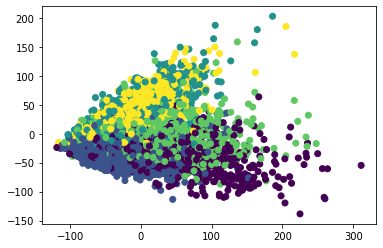

In [23]:
f_pca = PCA(n_components=2).fit_transform(f_all)
plt.scatter(*f_pca.T, c=y_all)

### QUESTION 19
***In a brief paragraph discuss: If the VGG network is trained on a dataset with perhaps totally different classes as targets, why would one expect the features derived from such a network to have discriminative power for a custom dataset?***
- Since VGG is already pretrained on some dataset, it already has weights, biases, and other parameters that are set and work for the initial targets. When it is trained again on a different data set, it can use these initial weights, biases, and parameters to quicken the learning process as it doesn't have the learn how to discriminate between classes from scratch; it already has some ability to do so, but these parameters will most likely have to be changed a little. This aspect of neural networks is called transfer learning and helps to provide an advantage over traditional machine learning algorithms. This is also similar to how humans learn as they use already learned knowledge to learn new things; they do not have relearn everything to learn a new concept, even if they are completely different. 

### QUESTION 20
***In a brief paragraph explain how the helper code base is performing feature extraction.***
- The helper code base loads the flower images and crops them in the middle so it is a 224x224 px size image and does feature extration on it using the `FeatureExtractor` class. This uses the VGG16 neural network that is already pretrained. The initial part of the class creates instance variables of the labels, average pooling layer, and the first part of fully-connected layer from VGG16. It also creates a variable that flattens an image into a vector. 
- To actually extract features, it only does a forward propagation that applies weights onto the input image to get its features. It then goes through the average pooling layer to get averages from patches within the image. This then gets flattened and the first part of fully connected layer from VGG16 is then returned. 

### QUESTION 21
***How many pixels are there in the original images? How many features does the VGG network extract per image; i.e what is the dimension of each feature vector for an image sample?***
- The original images have several sizes which as 240x160 px, 240x176 px, etc. The aspect ratios range from 0.5 to 5.5. However, since VGG only accepts inputs that are 224x224 px, each image is cropped to that size. The network extracts 4096 features per image; the `f_all` shape is (3670, 4096), which implies that there are 3670 samples with 4096 features each. 

### QUESTION 22
***Are the extracted features dense or sparse? (Compare with sparse TF-IDF features in text.)***
- The extracted features are dense. The cell below shows the sparsity of the TF-IDF data which is almost 1; this indicates that most of the elements in the matrix is 0. On the other hand, the sparsity of the extracted features is 0; this indicates that basically there are no elements that are 0 in the matrix. 

In [ ]:
TFIDF_sparsity = 1.0 - np.count_nonzero(newsgroups_tfidf.todense()) / newsgroups_tfidf.todense().size
print('TF-IDF Sparsity: ', TFIDF_sparsity)

VGG_sparsity = 1.0 - np.count_nonzero(f_all) / f_all.size
print('VGG Sparsity: ', VGG_sparsity)

TF-IDF Sparsity:  0.9975553721172636
VGG Sparsity:  0.0


### QUESTION 23
***In order to inspect the high-dimensional features, t-SNE is a popular off-the-shelf choice for visualizing Vision features. Map the features you have extracted onto 2 dimensions with t-SNE. Then plot the mapped feature vectors along x and y axes. Color-code the data points with ground-truth labels. Describe your observation.***

### QUESTION 24
***Report the best result (in terms of rand score) within the table below.
For HDBSCAN, introduce a conservative parameter grid over min cluster size and min samples***

| Module | Alternatives | Hyperparameters |
| --- | --- | --- |
| Dimensionality Reduction | None | N/A |
| Dimensionality Reduction | SVD | $r = 50$ |
| Dimensionality Reduction | UMAP | n_components $ = 50$ |
| Dimensionality Reduction | Autoencoder | num features $= 50$ |
| Clustering | K-Means | $k = 5$ |
| Clustering | Agglomerative Clustering | n_clusters $ = 5$ |
| Clustering | HDBSCAN | min cluster size & min samples |

- The metrics for all the combinations are shown below. The best combination was using the UMAP dimensionality reduction with `n_components = 50` and Kmeans clustering with `k=5` as it had the highest rand score of 0.46646645373752543. 
- For HDBSCAN, we close `min_cluster_size` to be 100 as it had the highest Vscore in the previous section and `min_sample` to be 5 as there are 5 labels.

In [24]:
import torch
import torchvision
from sklearn.base import TransformerMixin

class Autoencoder(torch.nn.Module, TransformerMixin):
    def __init__(self, n_components):
        super().__init__()
        self.n_components = n_components
        self.n_features = None  # to be determined with data
        self.encoder = None
        self.decoder = None
        
    def _create_encoder(self):
        return nn.Sequential(
            nn.Linear(4096, 1280),
            nn.ReLU(True),
            nn.Linear(1280, 640),
            nn.ReLU(True), nn.Linear(640, 120), nn.ReLU(True), nn.Linear(120, self.n_components))
    
    def _create_decoder(self):
        return nn.Sequential(
            nn.Linear(self.n_components, 120),
            nn.ReLU(True),
            nn.Linear(120, 640),
            nn.ReLU(True),
            nn.Linear(640, 1280),
            nn.ReLU(True), nn.Linear(1280, 4096))
    
    def forward(self, X):
        encoded = self.encoder(X)
        decoded = self.decoder(encoded)
        return decoded
    
    def fit(self, X):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        self.n_features = X.shape[1]
        self.encoder = self._create_encoder()
        self.decoder = self._create_decoder()
        self.cuda()
        self.train()
        
        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

        for epoch in tqdm(range(100)):
            for (X_,) in dataloader:
                X_ = X_.cuda()
                # ===================forward=====================
                output = self(X_)
                loss = criterion(output, X_)
                # ===================backward====================
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        return self     
        
    def transform(self, X):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        self.eval()
        with torch.no_grad():
            return self.encoder(X).cpu().numpy()

In [41]:
from sklearn.metrics.cluster import adjusted_rand_score

def find_best_RAND(reducer, clustering_method, input, target):

  # reduce dimensionality
  if reducer == "SVD":
      svd = TruncatedSVD(n_components = 50, random_state=0)
      data = svd.fit_transform(input)
  elif reducer == "Autoencoder":
      autoencoder = Autoencoder(50)
      data = autoencoder.fit_transform(input)
  elif reducer == "UMAP":
      umap_cosine = umap.UMAP(n_components= 50, metric='cosine', random_state=0)
      data = umap_cosine.fit_transform(input)
  else:
      data = input

    # clustering
  if clustering_method == 'KMeans':
      kmeans = KMeans(random_state=0, n_clusters=5, max_iter=1000, n_init=30)
      kmeans.fit(data)

      score = adjusted_rand_score(target,kmeans.labels_) # get scores

      print("\nFor ", reducer, "r = 50 and Kmeans (k=5), rand_score = ", score)
  
  elif clustering_method == 'Agglomerative':
      Agglomerative = AgglomerativeClustering(n_clusters=20, linkage='ward')
      Agglomerative.fit(data)

      score = adjusted_rand_score(target,Agglomerative.labels_) # get scores

      print("\nFor ", reducer, "r = 50 and Agglomerative (k=5), rand_score = ", score)
  
  else:    
      clusterers = hdbscan.HDBSCAN(min_cluster_size= 100, min_samples=5)
      cluster_data = clusterers.fit_predict(data)

      score = adjusted_rand_score(target,cluster_data) # get scores

      print("\nFor ", reducer, "r = 50 and HDBSCAN (min_cluster_size=100, min_samples=5), rand_score = ", score)

In [42]:
find_best_RAND('SVD', 'KMeans', f_all, y_all)
find_best_RAND('Autoencoder', 'KMeans', f_all, y_all)
find_best_RAND('UMAP', 'KMeans', f_all, y_all)


For  SVD r = 50 and Kmeans (k=5), rand_score =  0.1938921465618317


100%|██████████| 100/100 [00:23<00:00,  4.27it/s]



For  Autoencoder r = 50 and Kmeans (k=5), rand_score =  0.25359829908642195

For  UMAP r = 50 and Kmeans (k=5), rand_score =  0.46646645373752543


In [43]:
find_best_RAND('SVD', 'Agglomerative', f_all, y_all)
find_best_RAND('Autoencoder', 'Agglomerative', f_all, y_all)
find_best_RAND('UMAP', 'Agglomerative', f_all, y_all)


For  SVD r = 50 and Agglomerative (k=5), rand_score =  0.17062676729125387


100%|██████████| 100/100 [00:23<00:00,  4.29it/s]



For  Autoencoder r = 50 and Agglomerative (k=5), rand_score =  0.22144710612158766

For  UMAP r = 50 and Agglomerative (k=5), rand_score =  0.2790702852914374


In [44]:
find_best_RAND('SVD', 'HDBSCAN', f_all, y_all)
find_best_RAND('Autoencoder', 'HDBSCAN', f_all, y_all)
find_best_RAND('UMAP', 'HDBSCAN', f_all, y_all)


For  SVD r = 50 and HDBSCAN (min_cluster_size=100, min_samples=5), rand_score =  0.0


100%|██████████| 100/100 [00:23<00:00,  4.30it/s]



For  Autoencoder r = 50 and HDBSCAN (min_cluster_size=100, min_samples=5), rand_score =  0.0

For  UMAP r = 50 and HDBSCAN (min_cluster_size=100, min_samples=5), rand_score =  0.09411014415380671


In [45]:
find_best_RAND('None', 'KMeans', f_all, y_all)
find_best_RAND('None', 'Agglomerative', f_all, y_all)
find_best_RAND('None', 'HDBSCAN', f_all, y_all)


For  None r = 50 and Kmeans (k=5), rand_score =  0.19361273364005044

For  None r = 50 and Agglomerative (k=5), rand_score =  0.19507272963231728

For  None r = 50 and HDBSCAN (min_cluster_size=100, min_samples=5), rand_score =  0.0


### QUESTION 25
***Report the test accuracy of the MLP classifier on the original VGG features. Report the same when using the reduced-dimension features (you have freedom in choosing the dimensionality reduction algorithm and its parameters). Does the performance of the model suffer with the reduced-dimension representations? Is it significant? Does the success in classification make sense in the context of the clustering results obtained for the same features in Question 24.***

In [ ]:
class MLP(torch.nn.Module):
    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 1280),
            nn.ReLU(True),
            nn.Linear(1280, 640),
            nn.ReLU(True), 
            nn.Linear(640, 5),
            nn.LogSoftmax(dim=1)
        )
        self.cuda()
    
    
    def forward(self, X):
        return self.model(X)
    
    def train(self, X, y):
        X = torch.tensor(X, dtype=torch.float32, device='cuda')
        y = torch.tensor(y, dtype=torch.int64, device='cuda')

        self.model.train()
        
        criterion = nn.NLLLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X, y)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

        for epoch in tqdm(range(100)):
            for (X_, y_) in dataloader:
                ##################################
                # you should implement this part #
                ##################################
                # ===================forward=====================
                output = self(X_)
                loss = criterion(output, y_)
                # ===================backward====================
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

        return self
    
    def eval(self, X_test, y_test):
        ##################################
        # you should implement this part #
        ##################################
        X_test = torch.tensor(X_test, dtype=torch.float32, device='cuda')
        y_test = torch.tensor(y_test, dtype=torch.int64, device='cuda')

        self.model.eval()

        criterion = nn.NLLLoss()
        optimizer = torch.optim.Adam(self.parameters(), lr=1e-3, weight_decay=1e-5)

        dataset = TensorDataset(X_test, y_test)
        dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

        correct = 0

        with torch.no_grad():
          for (X_, y_) in dataloader:
            output = self(X_)
            pred = output.argmax(1, keepdim=True)
            correct += pred.eq(y_.view_as(pred)).sum().item()
        accuracy = 100. * correct / len(dataloader.dataset)
        print('Accuracy :', accuracy, '%')

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(f_all, y_all, test_size = 0.2, random_state=0)

mlp_model = MLP(num_features)
mlp_model.train(xtrain, ytrain)
print('\nMLP classifier on the original VGG features: ')
mlp_model.eval(xtest, ytest)

100%|██████████| 100/100 [00:08<00:00, 11.49it/s]


MLP classifier on the original VGG features: 
Accuracy : 91.14441416893733 %


In [ ]:
umap_cosine = umap.UMAP(n_components=200, metric='cosine', random_state=0)
xtrain_umap = umap_cosine.fit_transform(xtrain)
xtest_umap = umap_cosine.transform(xtest)

mlp_model = MLP(200)
mlp_model.train(xtrain_umap, ytrain)
print('\nVGG features with UMAP Dimensionality Reduction: ')
mlp_model.eval(xtest_umap, ytest)

100%|██████████| 100/100 [00:07<00:00, 14.16it/s]


VGG features with UMAP Dimensionality Reduction: 
Accuracy : 82.97002724795641 %
